In [33]:
# NAI Zjazd 2 - System logiki rozmytej - Cezary Graban s21752, Paweł Iwiński s19771
%%capture
import sys
import os
import matplotlib.pyplot as plt
!{sys.executable} -m pip install simpful
!{sys.executable} -m pip install scikit-fuzzy
from IPython import display

In [71]:
from simpful import *
import matplotlib.pyplot as plt

class MyFuzzySystem:
    # A simple fuzzy inference system

    def __init__(self) -> None:
        """CConstructor responsible for the whole fuzzy system setup."""
        # Create a fuzzy system object.
        self.FS = FuzzySystem()

        # Create fuzzy variables.
        self.__prepare_fuzzy_variables()

        # Add rules to our system
        self.__prepare_fuzzy_rules()
    
    def __prepare_fuzzy_variables(self):
        """Private method to prepare the variables and add them to our system."""
        # Define fuzzy sets and linguistic variables
        M_1 = FuzzySet(function=Trapezoidal_MF(a=15, b=15, c=30, d=35), term="low")
        M_2 = FuzzySet(function=Trapezoidal_MF(a=30, b=60, c=65, d=65), term="medium")
        M_3 = FuzzySet(function=Trapezoidal_MF(a=60, b=80, c=280, d=280), term="high")
        self.LV_1 = LinguisticVariable([M_1, M_2, M_3], concept="metrage", universe_of_discourse=[0, 280])
        self.FS.add_linguistic_variable("metrage", self.LV_1)

        N_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=2, c=2, d=3), term="low")
        N_2 = FuzzySet(function=Trapezoidal_MF(a=2, b=3, c=4, d=5), term="medium")
        N_3 = FuzzySet(function=Trapezoidal_MF(a=4, b=5, c=10, d=10), term="high")
        self.LV_2 = LinguisticVariable([N_1, N_2, N_3], concept="num_of_rooms", universe_of_discourse=[1, 10])
        self.FS.add_linguistic_variable("num_of_rooms", self.LV_2)

        F_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=1, c=3, d=4), term="low")
        F_2 = FuzzySet(function=Triangular_MF(a=3, b=5, c=7), term="medium")
        F_3 = FuzzySet(function=Trapezoidal_MF(a=6, b=8, c=28, d=28), term="high")
        self.LV_3 =  LinguisticVariable([F_1, F_2, F_3], concept="floor", universe_of_discourse=[0, 28])
        self.FS.add_linguistic_variable("floor", self.LV_3)

        # Define output fuzzy sets and linguistic variable
        A_1 = FuzzySet(function=Trapezoidal_MF(a=100000, b=135000, c=175000, d=225000), term="low")
        A_2 = FuzzySet(function=Trapezoidal_MF(a=200000, b=300000, c=450000, d=550000), term="medium")
        A_3 = FuzzySet(function=Trapezoidal_MF(a=475000, b=550000, c=750000, d=800000), term="high")
        A_4 = FuzzySet(function=Trapezoidal_MF(a=750000, b=800000, c=1000000, d=1100000), term="very high")
        A_5 = FuzzySet(function=Trapezoidal_MF(a=1000000, b=1200000, c=1400000, d=2500000), term="extreme")
        self.LV_4 = LinguisticVariable([A_1, A_2, A_3, A_4], universe_of_discourse=[100000, 2500000])
        self.FS.add_linguistic_variable("price", self.LV_4)

    def __prepare_fuzzy_rules(self):
        """Private method to define fuzzy variables for our fuzzy system."""
        self.FS.add_rules([
            "IF (num_of_rooms IS low) AND (floor IS low) AND (metrage IS low) THEN (price IS low)",
            "IF (num_of_rooms IS low) AND (floor IS low) AND (metrage IS medium) THEN (price IS medium)",
            "IF (num_of_rooms IS low) AND (floor IS low) AND (metrage IS high) THEN (price IS high)",
            "IF (num_of_rooms IS low) OR (floor IS medium) AND (metrage IS low) THEN (price IS low)",
            "IF (num_of_rooms IS low) AND (floor IS medium) AND (metrage IS medium) THEN (price IS high)",
            "IF (num_of_rooms IS low) AND (floor IS high) AND (metrage IS high) THEN (price IS extreme)",
            "IF (num_of_rooms IS medium) AND (floor IS medium) AND (metrage IS medium) THEN (price IS high)",
            "IF (num_of_rooms IS medium) AND (floor IS medium) AND (metrage IS high) THEN (price IS extreme)",
            "IF (num_of_rooms IS medium) AND (floor IS low) AND (metrage IS high) THEN (price IS extreme)",
            "IF (num_of_rooms IS medium) OR (floor IS low) AND (metrage IS low) THEN (price IS low)",
            "IF (num_of_rooms IS medium) OR (floor IS medium) AND (metrage IS medium) THEN (price IS high)",
            "IF (num_of_rooms IS medium) AND (floor IS high) AND (metrage IS medium) THEN (price IS very high)",
            "IF (num_of_rooms IS high) AND (floor IS high) AND (metrage IS high) THEN (price IS extreme)",
        ])

    def plot_the_variables(self):
        """Function to plot all 3 variables used to determine the value."""
        # Start plotting on 2x4 matrix.
        fig, ax = plt.subplots(2, 2)
        fig.set_figheight(12)
        fig.set_figwidth(12)
        self.LV_1.draw(ax=ax[0][0])
        self.LV_2.draw(ax=ax[0][1])
        self.LV_3.draw(ax=ax[1][0])
        plt.tight_layout()

    def get_price(self, metrage, num_of_rooms, floor):
        """Calculate the price of a house for given variables.

        Args:
            metrage (int): House square meters as an int (Universe: 0 - 280).
            num_of_rooms (int): Number of rooms as int (Universe: 1 - 10).
            floor (int): Floor where apartment is located, where 0 is ground floor (Universe: 0 - 28).

        Returns:
            Dict: Dictionary with price as key and property price as key value.
        """
        # Set antecedents values
        self.FS.set_variable("metrage", metrage)  # Universe: 0 - 280
        self.FS.set_variable("num_of_rooms", num_of_rooms)  # Universe: 1 - 10
        self.FS.set_variable("floor", floor)  # Universe: 0 - 28

        # Perform Mamdani inference and print output
        return self.FS.Mamdani_inference(["price"])  # Universe: 100000 - 1000000


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

Estimated price is 687375 zł


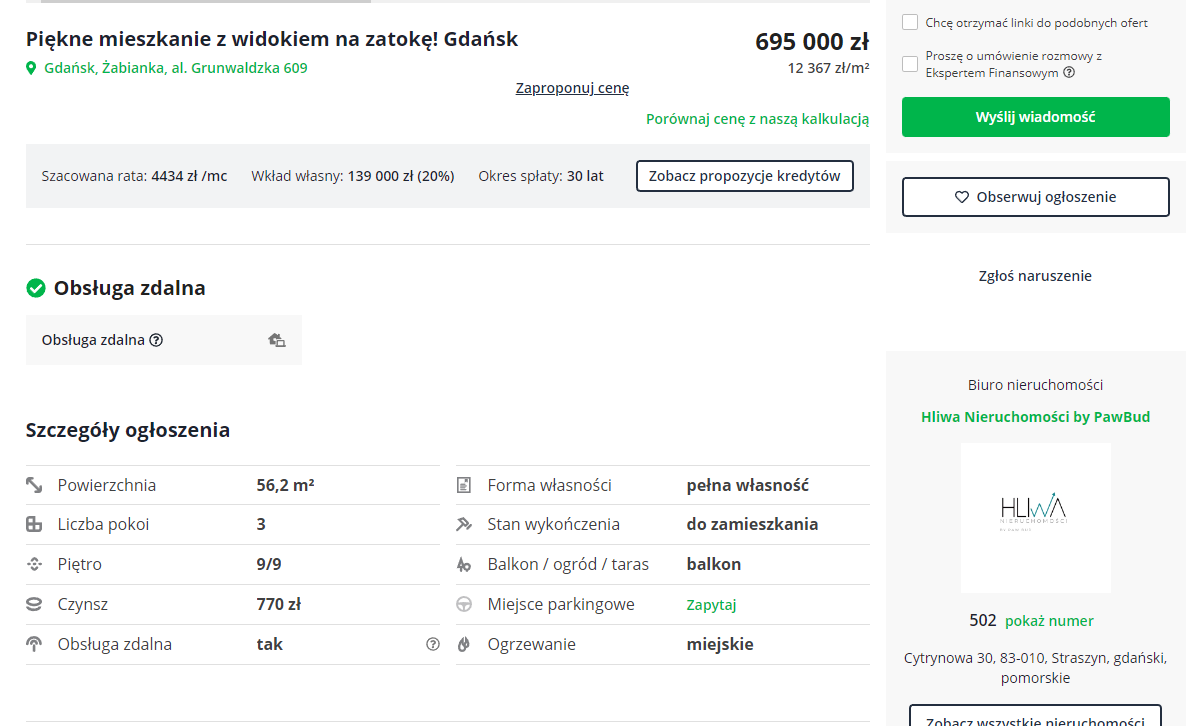

In [72]:
# Define the problem parameters
metrage = 56
number_of_rooms = 3
floor = 9

# Construct fuzzy system
fuzzy_obj = MyFuzzySystem()
price = fuzzy_obj.get_price(metrage, number_of_rooms, floor)

# Elaborate on estimate and assert the values
print(f'Estimated price is {int(price["price"])} zł')

# Compare to real life example
display.Image("example_1.png")


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

Estimated price is 424164 zł


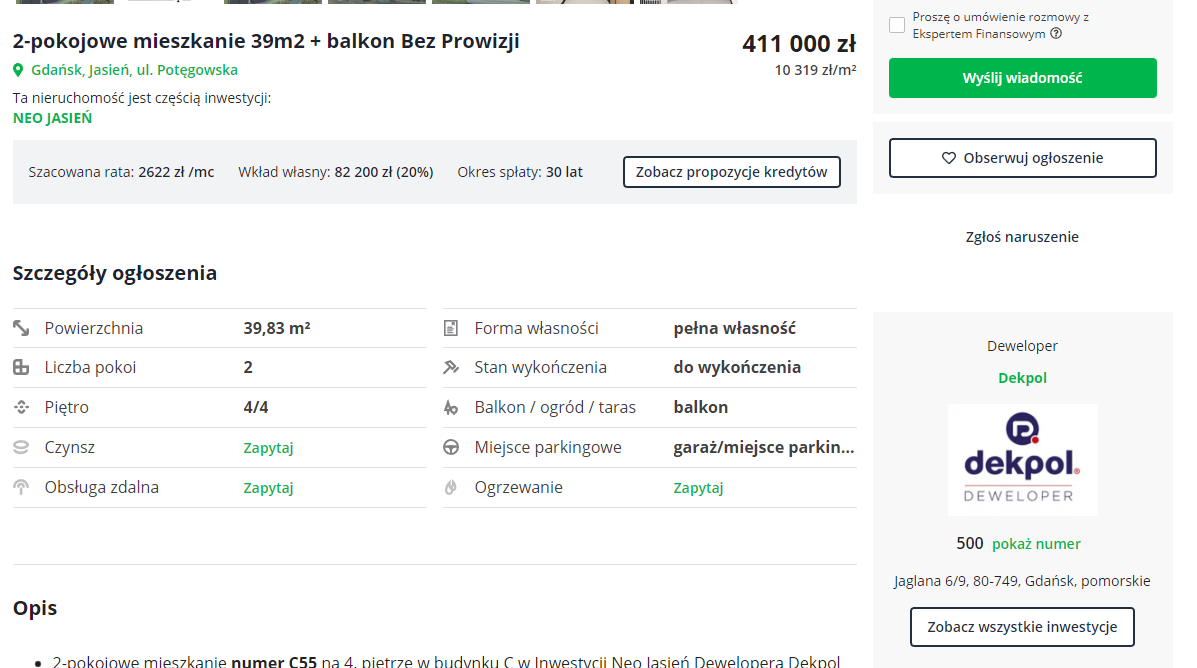

In [85]:
# Define the problem parameters
metrage = 40
number_of_rooms = 2
floor = 4

# Construct fuzzy system
fuzzy_obj = MyFuzzySystem()
price = fuzzy_obj.get_price(metrage, number_of_rooms, floor)

# Elaborate on estimate and assert the values
print(f'Estimated price is {int(price["price"])} zł')

# Compare to real life example
display.Image("example_2.png")


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



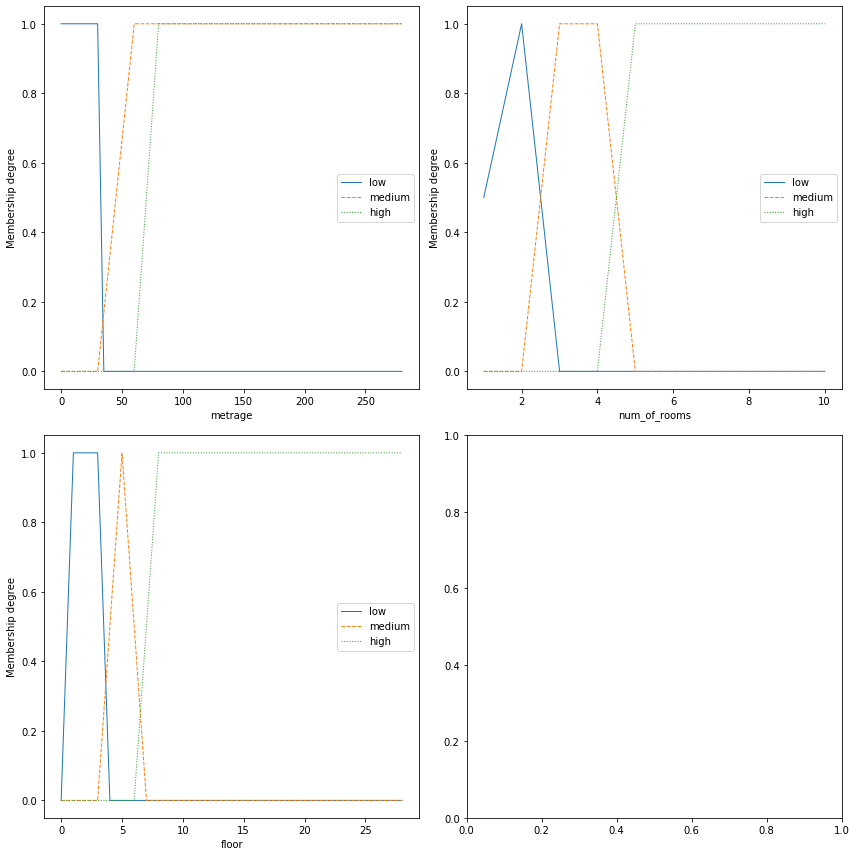

In [86]:
# Plot the variables used by our system
fuzzy_obj = MyFuzzySystem()
fuzzy_obj.plot_the_variables()